# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- *Does the Smartcab move at all during the simulation?*

  During the simulation, the smartcab is moving slowly but still.


- *What kind of rewards is the driving agent receiving?*

  The compensation that the agent is currently receiving will be a reward for keeping the traffic regulations. 
  
  When the traffic lights are red, they do not go straight to the signal or move to the right, but they receive a high compensation, but in the opposite case they seem to receive low compensation. (negative) 
  
  Conversely, if the traffic light is green, it will be compensated for when going straight or moving to the left, but in the opposite case it will receive low compensation.


- *How does the light changing color affect the rewards?*  

  The signal does not change according to the compensation because it is the environment that the smartcab currently has. I think that this signal represents the Transition model in the MDP problem. In other words, it is an environmental factor if you get different compensation depending on the behavior in each state.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

* __AGENT.PY__

  The ___learning___ is a variable that determines whether or not the LearningAgent class is to be used for machine learning.

  The ___epsilon___ variable is a variable that gives a stochastic element to the agent's behavior.
  The default value is set to 1 and according to the equation determined by the Q function, only the action with the highest reward in the current state proceeds. Adjusting this variable, however, can lead to other than optimal behavior.

  The ___alpha___ variable is a variable that weights the learning of the agent to calculate different rewards for the current and future behavior.
  Even if the current behavior shows the highest reward at the moment, the largest reward in the environment can occur after the other action with low reward at present. This variable is used to handle these cases.
  
  
* __ENVIRONMENT.PY__

  Every time the agent performs an action, the ___Environment.act___ function is called. 

  This function uses the current state of the agent and the state of the traffic light to determine violation of the traffic rules of the agent. And we calculate the reward value for the actions that can be done in the current state by using information on the law violation information and remaining deadline.


* __SIMULATOR.PY__

  ___ render_text () ___, ___ render () ___ is called from within the Simulator.run () function. The simulation results are shown for the same purpose. However, the ___ render_text () ___ function outputs this to the terminal in the CLI environment, while the ___ render () ___ function shows it in the GUI environment using the pygame library.


* __PLANNER.PY__

  The ___planner___ ___ next_waypoint () ___ function calculates the East-West direction before North-South.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


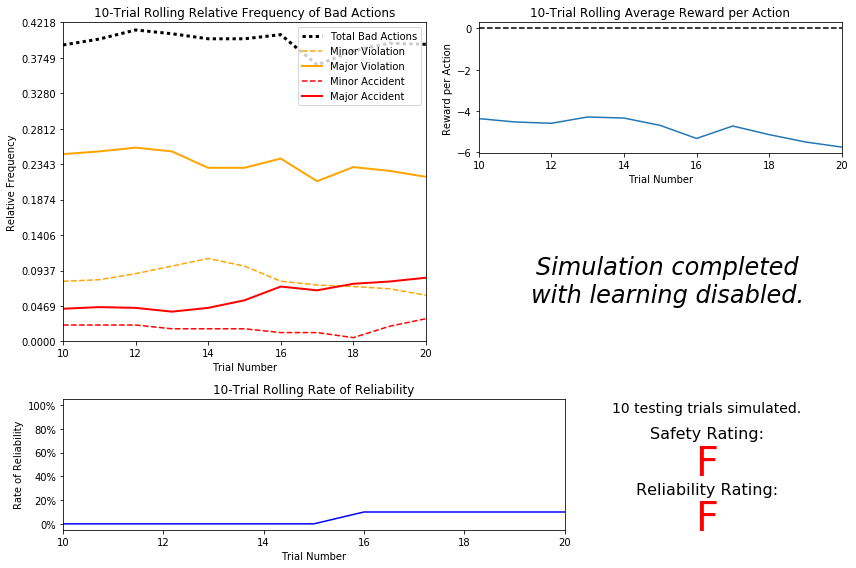

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*

  The probability of BAD ACTION is about 40% in SMARTCAB operation based on probability rather than learning.


- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*

  The reliability of the current survey seems to be 0% ~ 10%. At the moment, when you set the ACTION for each state, you set it randomly without any special criteria. So I think it is a real lucky situation that there are cases to reach the destination. I think that the result came out right.


- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*

  The reward that is provided in this environment is the reward that occurs depending on whether the agent 's behavior conforms to the traffic regulations. (It seems that there was no accident because elements such as alpha and epsilon were fixed.) Actually, the environment.act () function that computes the reward is calculated by subtracting the penalty that occurs over time from the +1 or +2 reward when moving according to the traffic regulations. However, if you violate the traffic regulations, you can see that it imposes a very bad reward from -5 to -40.
  

- *As the number of trials increases, does the outcome of results change significantly?*

  Learning continues but the results do not seem to improve significantly.

  In the first form, there is no big change in the probability of doing BAD ACTION. However, MAJOR ACCIDENT is increasing. The second set reflects the fact that the level of REWARD continues to decline.

  The third picture shows a tendency that the reliability of reaching the destination is somewhat higher. However, it is hard to imagine that the result is better if you make a random selection many times. It is reasonable to assume that it is simply caused by probability.


- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

  I would like to tell passengers not to use this SMARTCAB. I do not think it is a recommended means of transportation in terms of stability and reliability in reaching its destination. If SMARTCAB is in the present condition, I think that it is a life security to ask to board.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

  For safety and reliability, the feature points I choose are waypoint, light, left, ongoing, and deadline.
 
  First, let's talk about stability.
  Light, left, and ongoing are important because you need to guard traffic signals and prevent accidents that may hurt other agents. If there is no traffic coming from the left road when there is a red signal, there is no accident. (If the direction of the smartcab at the intersection is a red signal, the other way is a green signal)
On the other hand, when I turn green, I need to see if there is a car coming from the direction that I go ahead.

  Next, let's talk about reliability.
  To arrive at the destination correctly, the best waypoint of the current state of the current learned policy will be important. And the deadline remaining until arrival at the destination will be an important factor in determining the next behavior of the smartcab. Therefore, we need waypoint and deadline feature points.

  Although the "right" feature point is information that can be obtained in the current environment, it is not information that we can use for our purposes in this environment.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

* The state of SMARTCAB WAYPOINT is three (forward, left, right). And here, there are four states of agents in the direction of LEFT and ONGOING: FORWARD, LEFT, RIGHT, NONE. (If there is no agent in the corresponding direction, the value of NONE is returned.) And here, there are two states of traffic lights at each intersection: GREEN and RED.

  Therefore, SMARTCAB has 3 * 4 * 2 = 24 situations in all the states in this environment.


* The problem is that all of the information in the game is open and in a deterministic environment. I do not know the status of an agent in the environment like a poker game, so I think I can create a policy at a reasonable level.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

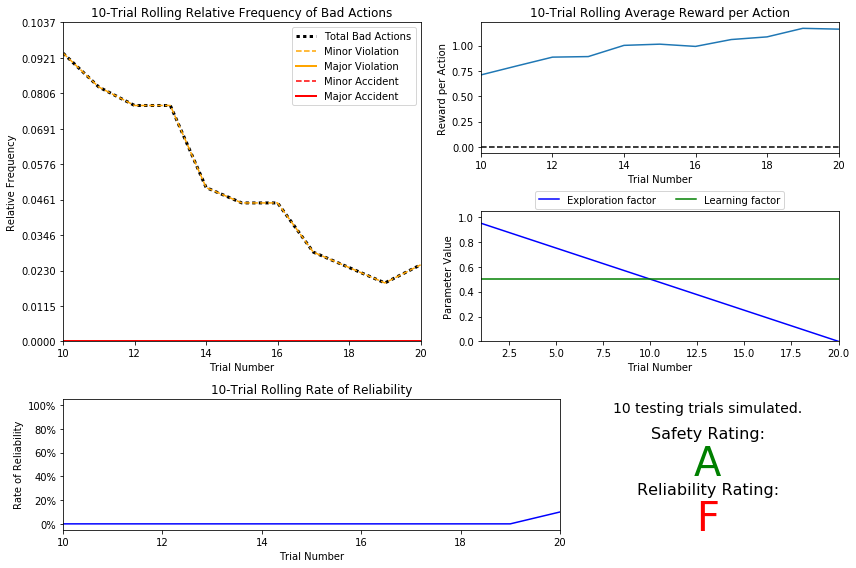

In [4]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*

  The third picture is similar to SMARTCAB, which was originally written. This picture shows the credibility of reaching the destination, but still shows a bad result.


- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*

  In this condition, since the TOLERANCE of the simulation set is 0.5, we can perform the test by performing 10 trains in case of epsilon = 0.05.
  Obviously, under the conditions we have set, this number of times will satisfy the TOLERANCE of the simulation.


- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*

  Yes. In the second figure on the right, you can see that the Exploration Factor is continuously decreasing by 0.05.


- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*

  Yes. The first figure on the left shows that BAD ACTION sharply decreases as training is applied while applying the learning agent. In the first right side of the chart, we can see that REWARD gets better as BAD ACTION decreases. (This is a natural consequence of REWARD being closely related to traffic regulations.)


- *How does the safety and reliability rating compare to the initial driving agent?*

  Compared with the first SMARTCAB agent, the stability was greatly improved from F grade to A grade. However, in terms of the reliability of destination arrival, the result is still not good with F grade.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

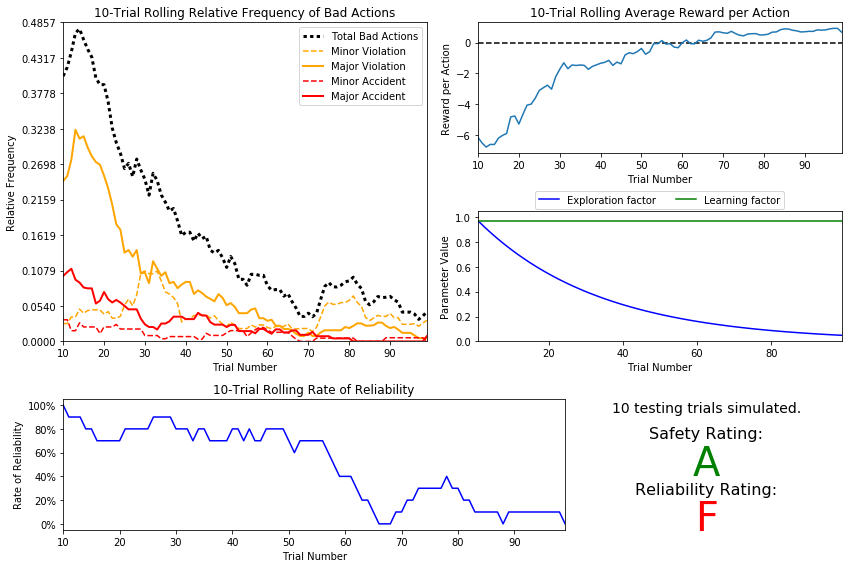

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation 
vs.plot_trials('sim_improved-learning-alpha-0-97.csv')

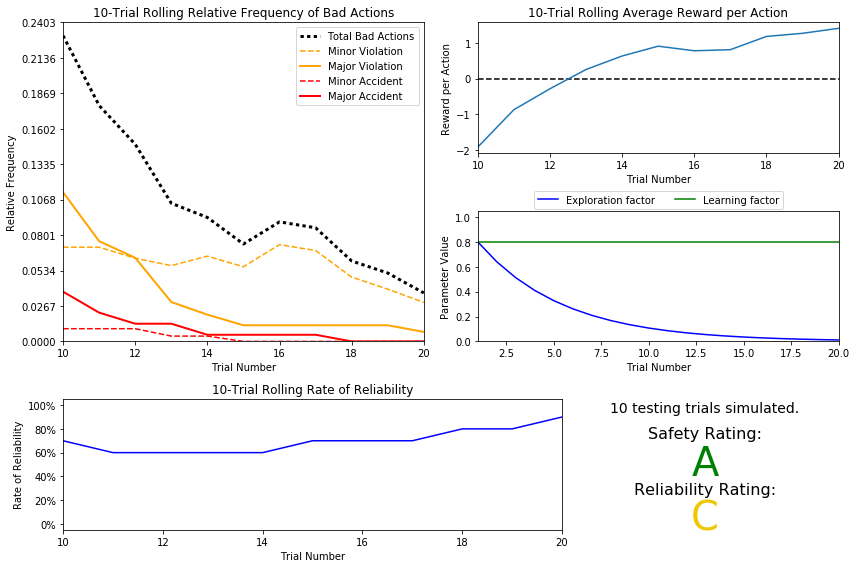

In [21]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

- *What decaying function was used for epsilon (the exploration factor)?*

  This is the function I chose.:

  $$ \epsilon = a^t, \textrm{for } 0 < a < 1 $$


- *Approximately how many training trials were needed for your agent before begining testing?*

  As shown in the figure, about 70 training sessions were required.


- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

  epsilon-tolerance = 0.05 / alpha = 0.8
  
  I wrote the code and tried several simulations and measured the results. At first I tried to hold Alpha around 0.1, but the number of learning was too small to get a good result.

  So I thought I had to set alpha as close as possible to 1.0 to make learning work. So I took the ALPHA value at 0.97 and run the test. In the ALPHA 0.97 simulation, the stability index showed good results, but the case that arrived at the destination showed a decreasing tendency as the test proceeded. Perhaps this is the over-fitting phenomenon of Q-run.

  So we lowered the ALPHA slightly to 0.8 and tried the simulation and got the simulation results at the bottom.
  
  I changed the TOLERANCE value several times to change the learning to be done more than I think.
  

- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*

  From a safety point of view, it is now doing almost nothing wrong. The problem is an indicator of the reliability of arriving at the destination, although it has improved a lot but it still does not produce satisfactory results.


- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

  I think we are learning at the right level. As a result, it has a very good score in terms of safety.


- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

  To be honest, I am not satisfied. I want to increase the reliability of destination arrival, but the situation is not so right now.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

```
~ 179 waypoint:forward|light:green|oncoming:None|left:left
~_180  -- forward : 4.21
  181  -- right : 0.00
+ 182  -- None : -3.60
  183  -- left : 0.00
```
As shown above, there was a policy that properly learned the direction to go.

Since you are receiving a green signal, SMARTCAB is able to move forward or to the left.

There is no vehicle coming from the front, the vehicle from the left is going to go to the left, but the SMARTCAB is red because it is not moving.

In this situation, SMARTCAB should select FORWARD, but if you look at the Q table, the value of FORWARD is the largest, so it is a well-learned result.

```
  107 waypoint:forward|light:red|oncoming:None|left:None
~ 108  -- forward : -13.13
~ 109  -- right : 38.70
~ 110  -- None : 0.83
~ 111  -- left : -9.51
```
On the other hand, as you can see from the above, we learned the same POLICY as advancing when we have to go to the right.

SMARTCAB is in a situation where it can stop or move right.

Since there is no vehicle coming from the front and no vehicle coming from the left side, SMARTCAB is stopped at the current state, and when the signal changes, it can go straight to the destination. (WAYPOINT = FORWARD)

In this situation, SMARTCAB will, however, choose RIGHT as a very high Q table value in the current situation. I think this is probably due to the fact that in a particular learning situation, I had reached the destination by going to the right in the same situation.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

To apply the concept of future REWARD in Q-learning, the code should be written to apply the concept of discount rate, but the concept of discount rate is not applied in the existing code. (Requires implementation of AGENT)

On the other hand, in environment, REWARD should be given to reach destination. However, since the agent does not have REWARD even if it reaches the destination, the agent is learning to reduce the traffic law related PENALTY.

```
359
360         # Did agent reach the goal after a valid move?
361         if agent is self.primary_agent:
362             if state['location'] == state['destination']:
363                 # Did agent get to destination before deadline?
364                 if state['deadline'] >= 0:
365                     self.trial_data['success'] = 1 
366
367                 # Stop the trial
368                 self.done = True
369                 self.success = True
370
371                 if(self.verbose == True): # Debugging
372                     print "Environment.act(): Primary agent has reached destination!"
373
374             if(self.verbose == True): # Debugging
375                 print "Environment.act() [POST]: location: {}, heading: {}, action: {}, reward: {}".format(location, heading, action, reward)
376
377             # Update metrics
378             self.step_data['t'] = self.t
379             self.step_data['violation'] = violation
380             self.step_data['state'] = agent.get_state()
381             self.step_data['deadline'] = state['deadline']
382             self.step_data['waypoint'] = agent.get_next_waypoint()
383             self.step_data['inputs'] = inputs
384             self.step_data['light'] = light
385             self.step_data['action'] = action
386             self.step_data['reward'] = reward
387
388             self.trial_data['final_deadline'] = state['deadline'] - 1 
389             self.trial_data['net_reward'] += reward
390             self.trial_data['actions'][violation] += 1
391
392             if(self.verbose == True): # Debugging
393                 print "Environment.act(): Step data: {}".format(self.step_data)
```

To make further modifications, you will need to tweak these two elements and implement them.



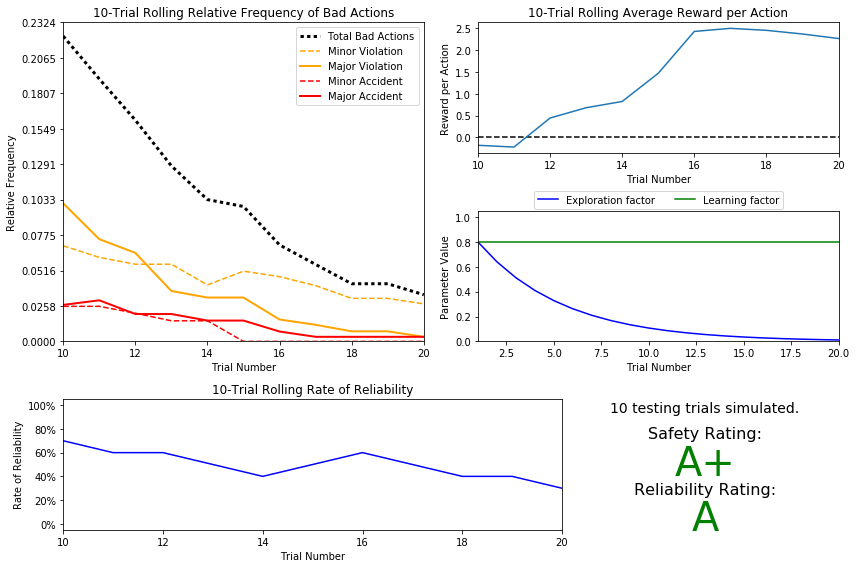

In [22]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('discounted-sim_improved-learning.csv')

This is the result of adding +40 to REWARD depending on discount rate and destination arrival. Other conditions are the same as before the application.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.